# FINAL PROJECT 1: LINEAR REGRESSION 
Project ini disusun guna memenuhi tugas akhir pertama dari Course Introduction to Python for Data Science.

### Group Members:
1. Tamara Cyntia Elizabeth Sihombing
2. Taj Mahdy Muhadzdzib

### Introduction:

In today's digital age, online transportation applications are becoming increasingly popular and used by many people to facilitate daily transportation. Uber and Lyft are two leading online transportation applications widely used in various cities around the world, including Boston, Massachusetts.

One important feature of online transportation applications is the ability to estimate the cost of a trip before ordering a car. Therefore, accurate price predictions are crucial to ensure a good user experience. The method commonly used to predict trip prices is Linear Regression, which has been used for decades in various applications.

In this research, a comparative analysis will be conducted between Linear Regression and Machine Learning methods to predict Uber and Lyft trip prices in the city of Boston. The dataset used is the Uber and Lyft Dataset Boston, MA which contains information about trip prices, distance, travel time, and other factors that affect the price.

The aim of this research is to compare the effectiveness and accuracy of Linear Regression in predicting Uber and Lyft trip prices in Boston. A Linear Regression model will be built using this dataset and then evaluated for its accuracy. These results will then be compared to the results of Machine Learning methods used in previous studies.

Thus, this research is expected to provide new insights into the use of Linear Regression methods in predicting Uber and Lyft trip prices, as well as providing better solutions for online transportation application users.

## Import Library:

In [1]:
import pandas as pd
from datetime import date
import numpy as np
import operator
import sympy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline
mpl.style.use(["ggplot"])
pd.set_option("display.max.columns",None)

## Load Dataset:

In [2]:
df = pd.read_csv('rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
# To Determine The Number of Rows and Columns in The Data
print("From the dataset, the number of rows obtained is comprised of:", len(df), "with a total number of columns:",len(df.columns))

From the dataset, the number of rows obtained is comprised of: 693071 with a total number of columns: 57


## Data Cleaning

In [4]:
# Checking Missing Value
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [5]:
# Replace NaN values in the price coloumns with price mean
df["price"] = df["price"].fillna(df["price"].mean())

In [6]:
df["datetime"] = pd.to_datetime(df["datetime"])
type(df["datetime"])

pandas.core.series.Series

In [7]:
# Converting data types using the datetime library
df['days name']=df['datetime'].dt.day_name()
df['time of drive'] = np.where(operator.and_(df['hour'] >= 5,df['hour']<12), 'Moring', (np.where(operator.and_(df['hour'] >= 12,df['hour']<17), 'Noon', (np.where(operator.and_(df['hour'] >= 17,df['hour']<22), 'Evening','Night')))))
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,days name,time of drive
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,Sunday,Moring
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,Tuesday,Night
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,Wednesday,Night
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,Friday,Night
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,Thursday,Night


In [11]:
df.to_csv('rideshare_kaggle_update.csv', index = False)

Drop irrelevant columns:

- id: It's unique for every row
- datetime: It's already been represented by hour, day, and month columns
- timestamp: It's similar to datetime column
- timezone: There's only one timezone within the dataframe

In [8]:
df = df.drop(["id","timestamp","datetime","timezone"],axis=1)

In [9]:
# Removing Outlier in the price column with Interquartile Range Method.
price_q1 = df["price"].describe().loc["25%"]
price_q3 = df["price"].describe().loc["75%"]
price_iqr = price_q3 - price_q1

price_lower_limit = price_q1 - (1.5 * price_iqr)
price_upper_limit = price_q3 + (1.5 * price_iqr)

df_without_outliers = df[(df["price"] >= price_lower_limit) & (df["price"] <= price_upper_limit)].copy()

We use Interquartile Range method for removing outliers. This Method is used because it provides a measure of the variability or spread of a dataset that is less affected by outliers compared to other measures like the range or standard deviation. It gives information about the middle 50% of the data and can help identify potential outliers or unusual observations. Additionally, interquartile range is useful in comparing the variability between different datasets, even if they have different means or distributions.

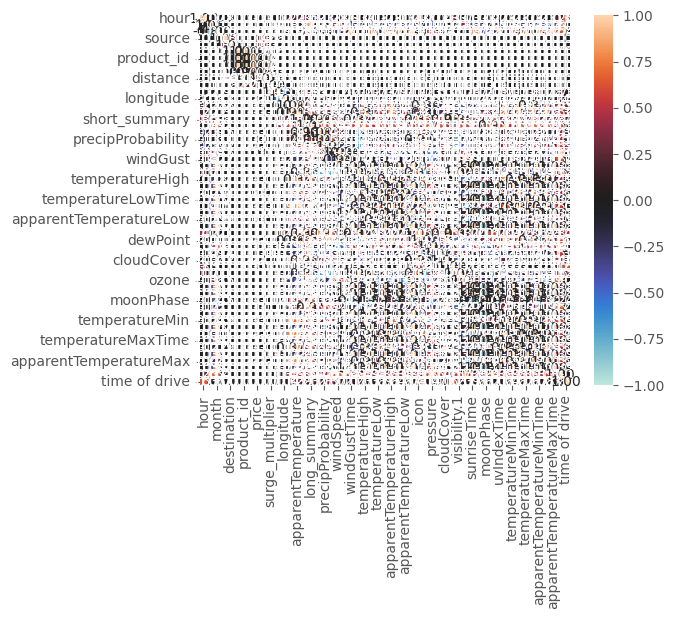

In [10]:
# Find the correlation between numerical and categorical variables.
from dython.nominal import associations

corr = associations(df_without_outliers)

As the correlation matrix produced is difficult to draw conclusions from, based on the correlation values, we will sort the 10 most influential attributes on the Price value, which will be used as the testing attributes in predicting the prices of online transportation services.

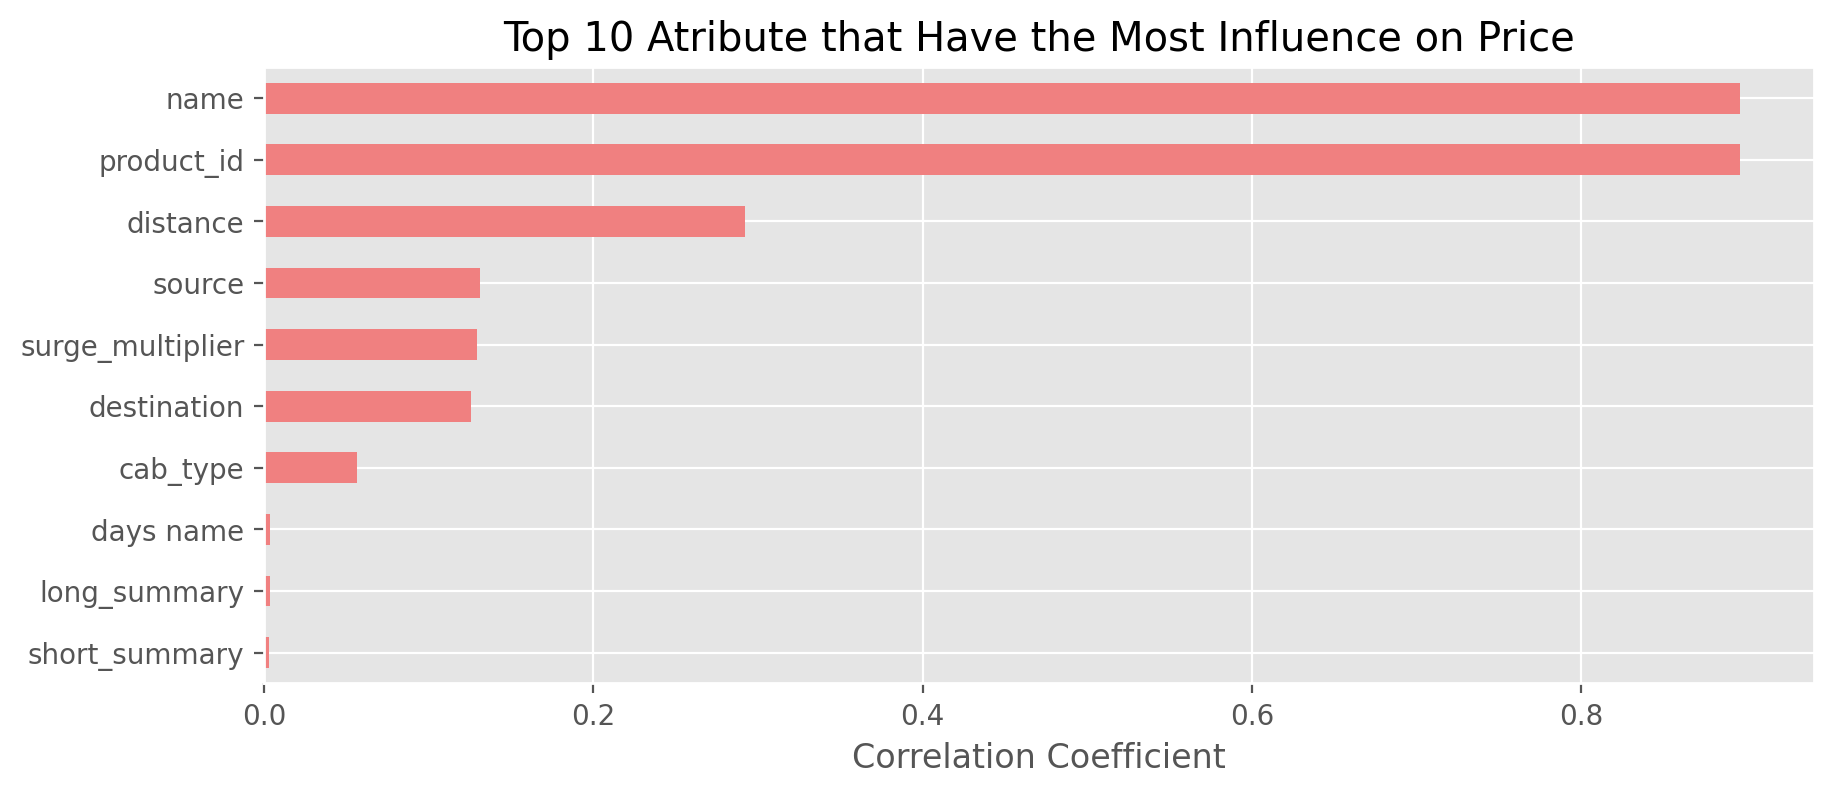

In [11]:
top_10_corr = abs(corr["corr"][["price"]].drop("price")).sort_values("price",ascending=False).head(10)

fig = plt.figure(figsize=(10,4),dpi=200)
top_10_corr.sort_values("price").plot(
    kind="barh",
    legend=None,
    color="lightcoral",
    ax=plt.gca()
)
plt.title("Top 10 Atribute that Have the Most Influence on Price")
plt.xlabel("Correlation Coefficient")
plt.show()

Thus, we will use 10 predictor atributs to predict the value of price. There are:
1. Name: The type of car chosen (Lux, Lux Black XL, Lyft, Lyft XL, UberXL, Taxi, Uberpool, Black SUV, WAV, Black, UberX, Lux Black, Shared)
2. Product_id: Uber/Lyft Identifier for Cab-Type
3. Distance: The distance between source and destination.
4. Source: Starting point of the ride
5. Surge_multiplier: The multiplier by which price was increased (Default 1)
6. Destination: Destination of the Ride.
7. Cab_type: Uber or Lyft
8. Days name: Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, and Saturday
9. Long_summary: long-term weather conditions in a day (Rain until morning and starting again in the evening, Light rain in the morning, Rain throughout the day, etc)
10. Short_summary: short-term weather conditions or the weather conditions at the time online transport booking (Overcast, Mostly cloud, partly cloudy, clear, light rain, rain, possible dizzle, foggy, drizle)

And now, we'll slice the dataframe based on those 10 atributs.

In [12]:
df_group = df_without_outliers[list(top_10_corr.index) + ["price"]]
df_group.head()

,product_id,name,distance,source,surge_multiplier,destination,cab_type,days name,long_summary,short_summary,price
0,lyft_line,Shared,0.44,Haymarket Square,1.0,North Station,Lyft,Sunday,Rain throughout the day.,Mostly Cloudy,5.0
1,lyft_premier,Lux,0.44,Haymarket Square,1.0,North Station,Lyft,Tuesday,"Rain until morning, starting again in the eve...",Rain,11.0
2,lyft,Lyft,0.44,Haymarket Square,1.0,North Station,Lyft,Wednesday,Light rain in the morning.,Clear,7.0
3,lyft_luxsuv,Lux Black XL,0.44,Haymarket Square,1.0,North Station,Lyft,Friday,Partly cloudy throughout the day.,Clear,26.0
4,lyft_plus,Lyft XL,0.44,Haymarket Square,1.0,North Station,Lyft,Thursday,Mostly cloudy throughout the day.,Partly Cloudy,9.0


## Exploration Data Analysis

In [13]:
df_group.describe()

,distance,surge_multiplier,price
count,685089.000000,685089.000000,685089.000000
mean,2.167018,1.010825,16.177718
std,1.116552,0.078060,8.281522
min,0.020000,1.000000,2.500000
25%,1.270000,1.000000,9.500000
50%,2.140000,1.000000,15.500000
75%,2.880000,1.000000,22.000000
max,7.860000,3.000000,42.000000


In [14]:
df_group.describe(exclude = np.number)

,product_id,name,source,destination,cab_type,days name,long_summary,short_summary
count,685089,685089,685089,685089,685089,685089,685089,685089
unique,13,13,12,12,2,7,11,9
top,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,North End,Back Bay,Uber,Tuesday,Mostly cloudy throughout the day.,Overcast
freq,55095,55095,57732,57600,383914,123460,199986,216392


Based on the descriptive statistics above, it can be concluded that the top preferred cabin type is Uber with product ID 9a0e7b09-b92b-4c41-9779-2ad22b4d779d, with an average distance of 2.167 km and generates an average revenue of 16,178 USD for online transportation services.

**Comparing which online transportation service is more frequently used between Uber and Lyft based on cab_type data**

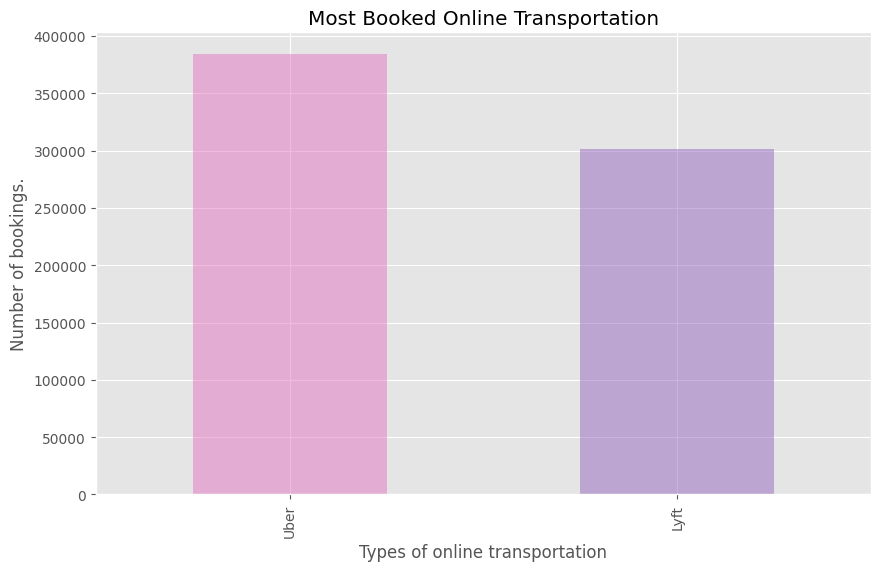

In [15]:
df_transport_name = df_group['cab_type'].value_counts()

df_transport_name.plot(kind='bar', figsize=(10,6), color=['#e377c2','#9467bd'], alpha=0.5)

plt.xlabel('Types of online transportation')
plt.ylabel('Number of bookings.')
plt.title('Most Booked Online Transportation')

plt.show()

In [16]:
uber_orders = df_group[df_group['cab_type'] == 'Uber']['distance'].count()
lyft_orders = df_group[df_group['cab_type'] == 'Lyft']['distance'].count()

# Bandingkan total pesanan
if uber_orders > lyft_orders:
    print('Uber is more commonly used with a total of orders:', uber_orders)
elif lyft_orders > uber_orders:
    print('Lyft is more commonly used with a total of orders:', lyft_orders)
else:
    print('Uber and Lyft are used with the same number of orders:', uber_orders)

Uber is more commonly used with a total of orders: 383914


**Conclution**: From the above bar chart results, it can be concluded that the online transportation most frequently booked by passengers is Uber with a total of 383,914 passengers and Lyft with a total of 307,408 passengers.

**Compare the average prices between the standard types of Uber and Lyft services, which are Uber and Lyft based on distance.**

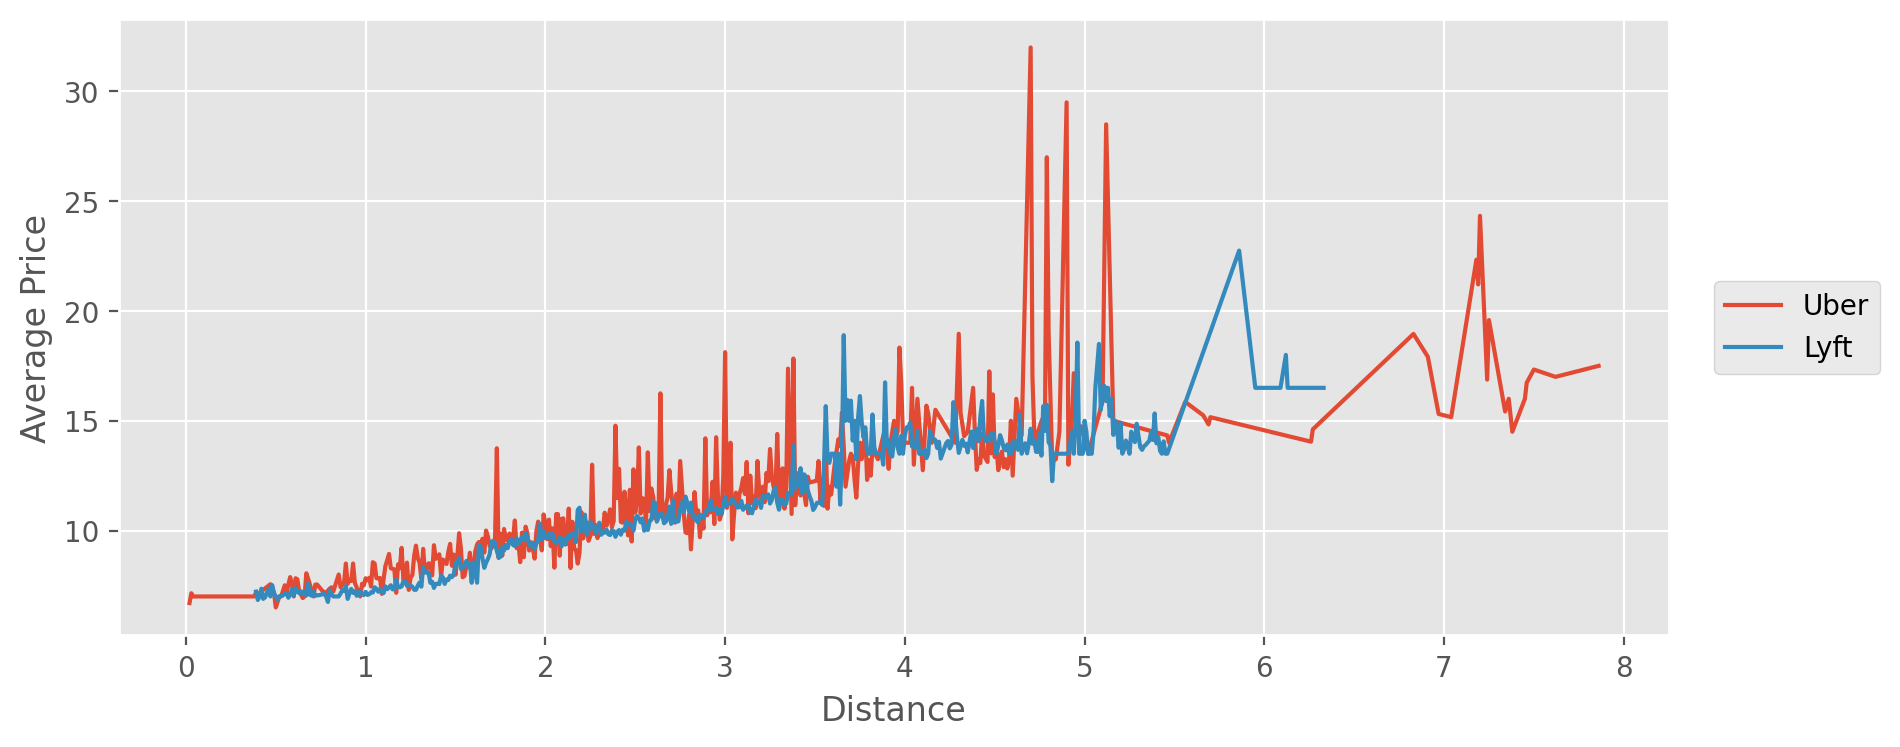

In [17]:
# Filter the dataset to include only standard Uber and Lyft services
df = df_group.loc[(df_group['cab_type'] == 'Uber') | (df_group['cab_type'] == 'Lyft')]
df = df_group.loc[(df_group['name'] == 'UberX') | (df_group['name'] == 'Lyft')]

# Calculate the average price for each distance category for both Uber and Lyft
uber_avg_price = df.loc[df['cab_type'] == 'Uber'].groupby('distance')['price'].mean()
lyft_avg_price = df.loc[df['cab_type'] == 'Lyft'].groupby('distance')['price'].mean()

# Create a plot to visualize the comparison
plt.figure(figsize = (10,4), dpi=200)
plt.plot(uber_avg_price.index, uber_avg_price.values, label='Uber')
plt.plot(lyft_avg_price.index, lyft_avg_price.values, label='Lyft')
plt.xlabel('Distance')
plt.ylabel('Average Price')
plt.legend(bbox_to_anchor=(1.02,0.5),loc = "center left")
plt.show()

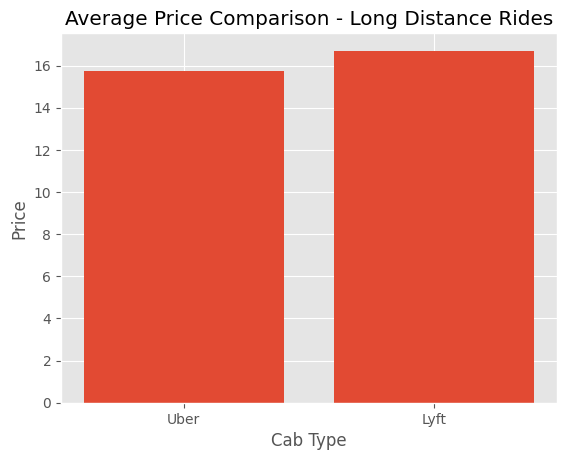

In [18]:
# Calculate the average price for each service
uber_price = df_group[df_group['cab_type'] == 'Uber']['price'].mean()
lyft_price = df_group[df_group['cab_type'] == 'Lyft']['price'].mean()

# Create a bar chart to compare the average price
plt.bar(['Uber', 'Lyft'], [uber_price, lyft_price])
plt.title('Average Price Comparison - Long Distance Rides')
plt.xlabel('Cab Type')
plt.ylabel('Price')
plt.show()

**Conclusion**: The Lyft online transportation service has a higher average price than Uber. The price of online transportation is also influenced by the distance from the pickup point to the drop-off point, the farther the distance, the more expensive the price.

**Calculate the percentages of the total prices based on the types of Uber and Lyft services.**

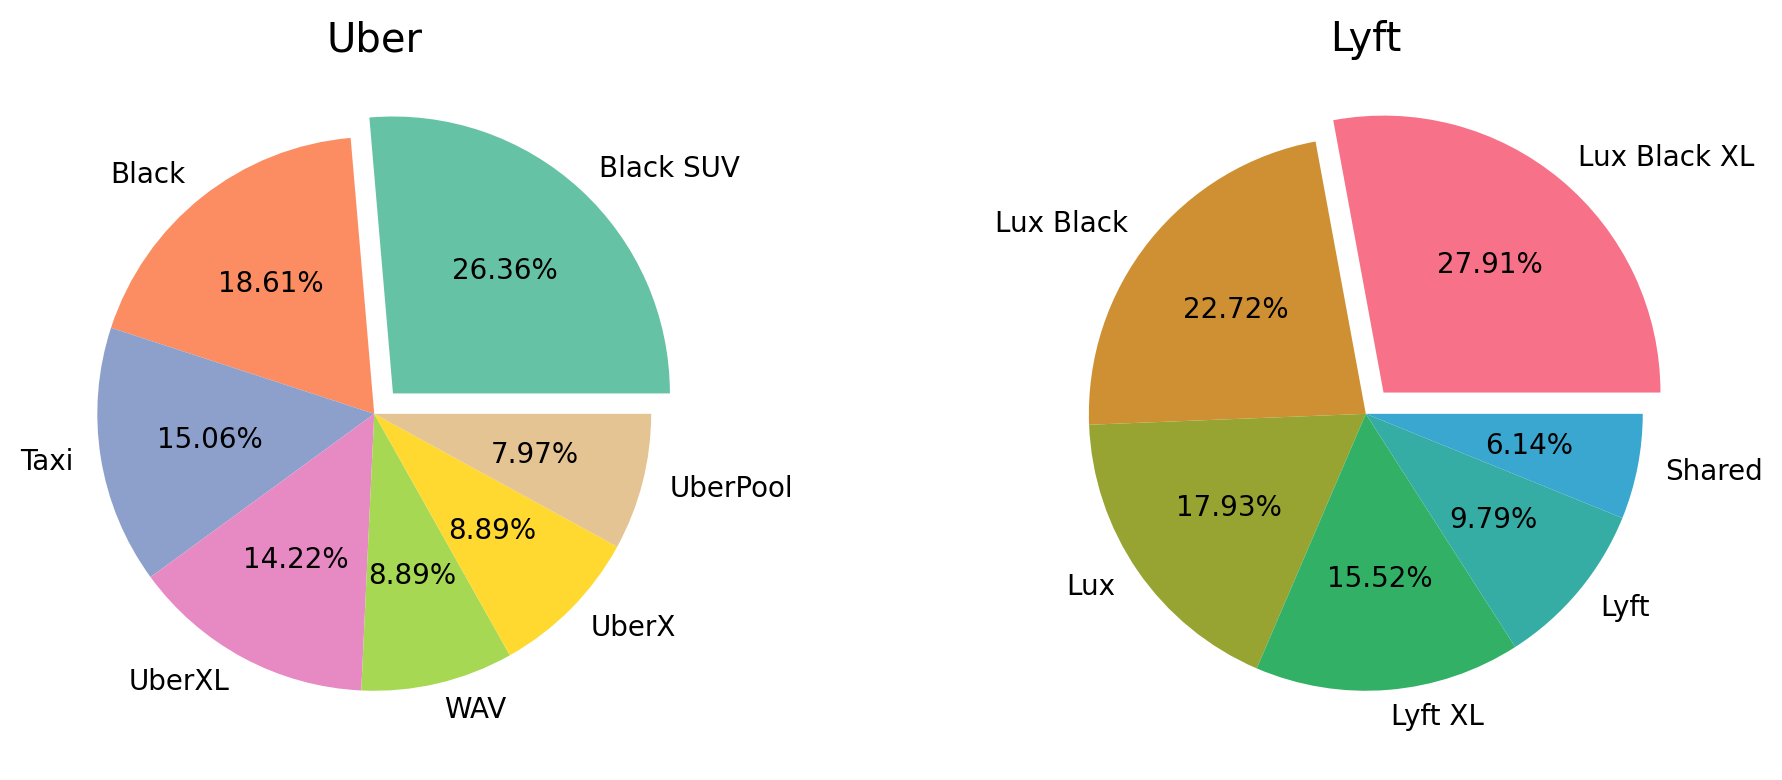

In [19]:
uber = df_group[df_group["cab_type"] == "Uber"].groupby("name").sum()[["price"]].sort_values("price",ascending=False)
lyft = df_group[df_group["cab_type"] == "Lyft"].groupby("name").sum()[["price"]].sort_values("price",ascending=False)

fig,ax = plt.subplots(figsize=(10,4),dpi=200,nrows=1,ncols=2)

ax[0].pie(uber["price"],labels=uber.index,autopct="%.2f%%",explode=[0.1,0,0,0,0,0,0],colors=sns.color_palette("Set2"))
ax[0].set_title("Uber")

ax[1].pie(lyft["price"],labels=lyft.index,autopct="%.2f%%",explode=[0.1,0,0,0,0,0],colors=sns.color_palette("husl", 8))
ax[1].set_title("Lyft")

plt.tight_layout()
plt.show()

**Comparing the prices of online transportation service  between Uber and Lyft based on surge_multiplier**

This will create a box plot that shows the distribution of prices for each service, grouped by surge multiplier values. We can use this plot to compare the prices between Uber and Lyft at different surge multiplier values.

<AxesSubplot: xlabel='cab_type', ylabel='price'>

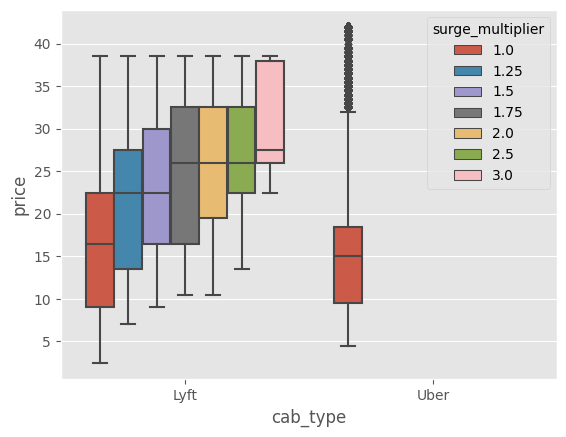

In [20]:
uber_data = df_group[df_group['cab_type']=='Uber'][['surge_multiplier', 'price']]
lyft_data = df_group[df_group['cab_type']=='Lyft'][['surge_multiplier', 'price']]

#Visualization
sns.boxplot(x ='cab_type', y = 'price', hue = 'surge_multiplier', data = df_group)

**Conclution**: From the plot, we can see that both Uber and Lyft have similar price distributions for surge multipliers below 1.5. However, for surge multipliers above 1.5, the prices for Lyft are generally higher than those for Uber. Overall, it appears that Lyft may have higher prices than Uber for certain surge multiplier values.

## Data Preprocessing

Define independent (X) and dependent (y) variables.

Note: Due to there are categorical independent variables, those variables can be encoded with *LabelEncoder* first.

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X = df_group.copy().drop("price",axis=1).apply(le.fit_transform)
y = df_group.copy()["price"]

Split the dataframe into training and testing sets with a ratio of 70:30.

In [22]:
# Split dataframe into training (70%), and testing(30%)
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1221)

print(f"Training dataset\t: {len(X_train)}")
print(f"Testing dataset\t\t: {len(X_test)}")

Training dataset	: 479562
Testing dataset		: 205527


Due to every independent variable has different scales, we can standardize them with *StandardScaler*.

In [23]:
# Scaling the data using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Definition and Training of The Model

Before building other models using methods such as Logistic Regression, Decision Tree, KNN, and others, let's start by building a basic linear regression model first.

## Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()
model_1.fit(scaled_X_train,y_train)

LinearRegression()

In [25]:
LinearRegression = model_1.fit(scaled_X_train, y_train)
LinearRegression.intercept_

16.174424139405737

Use the newly created linear regression model to predict the price.

In [26]:
base_pred = model_1.predict(scaled_X_test)

In [27]:
model_1.coef_

array([ 2.84611721e+00, -5.91219493e+00,  2.54061796e+00,  1.20135209e-01,
        9.09600887e-01,  6.63906053e-02,  4.28786162e+00, -1.38521032e-03,
       -1.05732685e-02,  4.97464557e-03])

In [28]:
LinearRegression_train_r2 = model_1.score(scaled_X_train, y_train)
LinearRegression_test_r2 = model_1.score(scaled_X_test, y_test)

print('Linear Regression train R squared : %.4f' % LinearRegression_train_r2)
print('Linear Regression test R squared": %.4f' % LinearRegression_test_r2)

Linear Regression train R squared : 0.5130
Linear Regression test R squared": 0.5140


In [29]:
from sklearn.metrics import mean_squared_error

LinearRegression_mse = mean_squared_error( y_test, base_pred)
LinearRegression_rmse = np.sqrt(LinearRegression_mse)
print('Linear Regression RMSE: %.4f' % LinearRegression_rmse)

Linear Regression RMSE: 5.7761


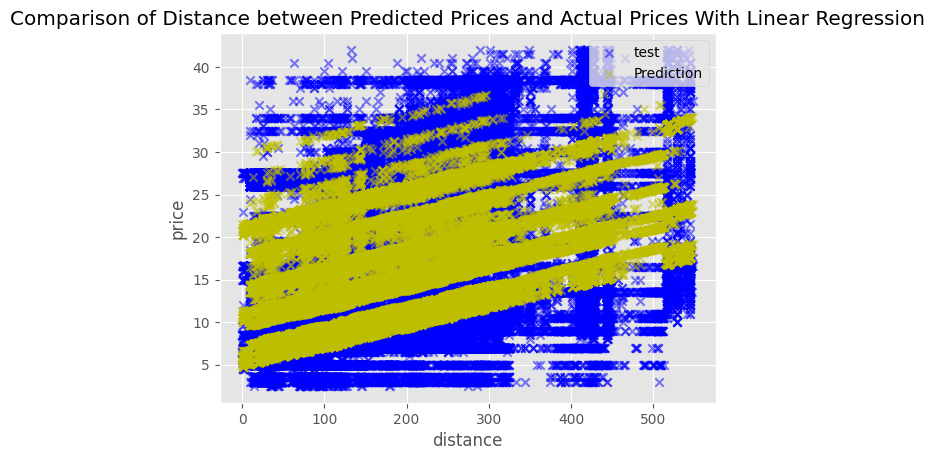

In [30]:
x_axis = X_test.distance 

plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = 'x', label = 'test')
plt.scatter(x_axis, base_pred, c = 'y', alpha = 0.5, marker = 'x', label = 'Prediction')
plt.xlabel('distance')
plt.ylabel('price') 
plt.title("Comparison of Distance between Predicted Prices and Actual Prices With Linear Regression")
plt.legend(loc = 'upper right')

## Polynomial Regression

In [31]:
# Transform the independent for polynomial regression (d=2)
from sklearn.preprocessing import PolynomialFeatures

model_2_X = PolynomialFeatures(degree=2,include_bias=False).fit_transform(X)

In [32]:
model_2_X_train, model_2_X_test, y_train, y_test = train_test_split(model_2_X, y, test_size=0.3, random_state=1221)

scaled_model_2_X_train = scaler.fit_transform(model_2_X_train)
scaled_model_2_X_test = scaler.transform(model_2_X_test)

In [33]:
from sklearn.linear_model import LinearRegression

poly_2_model = LinearRegression()
poly_2_model.fit(scaled_model_2_X_train,y_train)

LinearRegression()

In [34]:
poly_2_pred = poly_2_model.predict(scaled_model_2_X_test)

As it can be seen, the polynomial regression ($d=2$) model has an $R^{2}$ score of 0.756146.

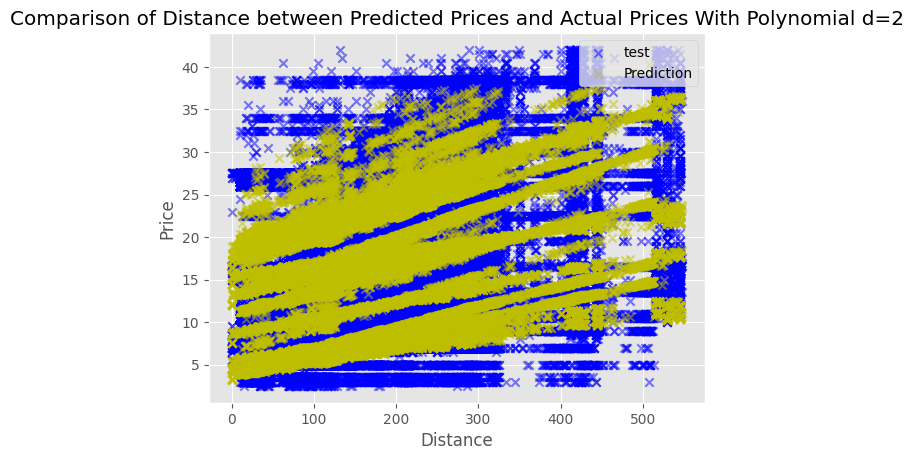

In [36]:
x_axis = X_test.distance 

plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = 'x', label = 'test')
plt.scatter(x_axis, poly_2_pred, c = 'y', alpha = 0.5, marker = 'x', label = 'Prediction')
plt.xlabel('Distance')
plt.ylabel('Price') 
plt.title("Comparison of Distance between Predicted Prices and Actual Prices With Polynomial d=2")
plt.legend(loc = 'upper right')

Now, transform the independent variables for polynomial regression ($d=3$) model.

In [37]:
poly_3_X = PolynomialFeatures(degree=3,include_bias=False).fit_transform(X)

In [38]:
poly_3_X_train,poly_3_X_test,y_train,y_test = train_test_split(poly_3_X,y,test_size=0.3,random_state=1221)

scaled_poly_3_X_train = scaler.fit_transform(poly_3_X_train)
scaled_poly_3_X_test = scaler.transform(poly_3_X_test)

Create and train the polynomial regression ($d=3$) model.

In [39]:
poly_3_model = LinearRegression()
poly_3_model.fit(scaled_poly_3_X_train,y_train)

LinearRegression()

Use the newly created polynomial regression ($d=3$) model to predict the price.

In [40]:
poly_3_pred = poly_3_model.predict(scaled_poly_3_X_test)

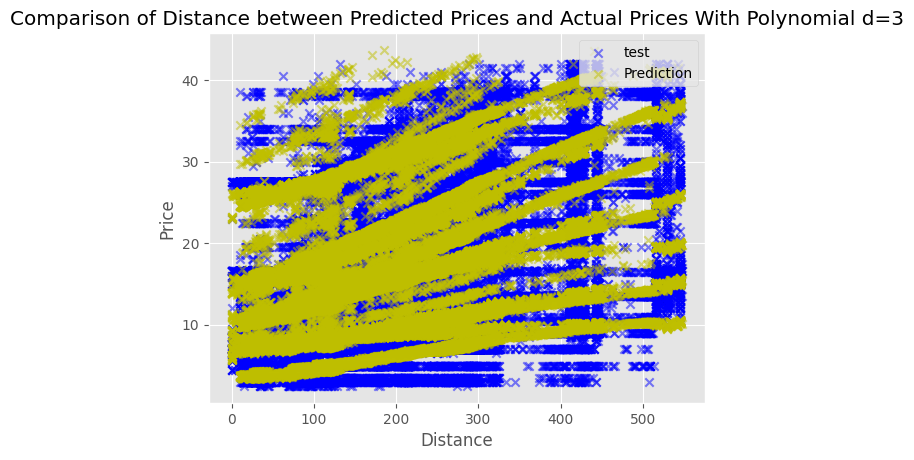

In [43]:
x_axis = X_test.distance 

plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = 'x', label = 'test')
plt.scatter(x_axis, poly_3_pred, c = 'y', alpha = 0.5, marker = 'x', label = 'Prediction')
plt.xlabel('Distance')
plt.ylabel('Price') 
plt.title("Comparison of Distance between Predicted Prices and Actual Prices With Polynomial d=3")
plt.legend(loc = 'upper right')

## Decision Tree Regressor

In [50]:
from sklearn.tree import DecisionTreeRegressor

model_3 = DecisionTreeRegressor()

In [51]:
# Train model menggunakan training set
dt_model = model_3.fit(scaled_X_train,y_train)

In [52]:
predictions_dt = dt_model.predict(scaled_X_test)

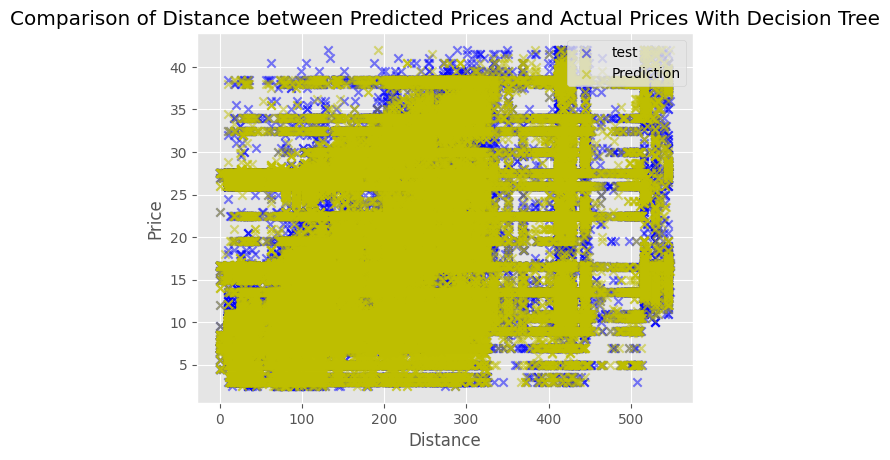

In [53]:
x_axis_dt = X_test.distance 

plt.scatter(x_axis_dt, y_test, c = 'b', alpha = 0.5, marker = 'x', label = 'test')
plt.scatter(x_axis_dt, predictions_dt, c = 'y', alpha = 0.5, marker = 'x', label = 'Prediction')
plt.xlabel('Distance')
plt.ylabel('Price') 
plt.title("Comparison of Distance between Predicted Prices and Actual Prices With Decision Tree")
plt.legend(loc = 'upper right')

plt.show()

## Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor

model_4 = RandomForestRegressor(n_estimators = 50, random_state = 15)

In [45]:
RandomForest = model_4.fit(scaled_X_train,y_train)

In [48]:
predictions_rf = RandomForest.predict(scaled_X_test)

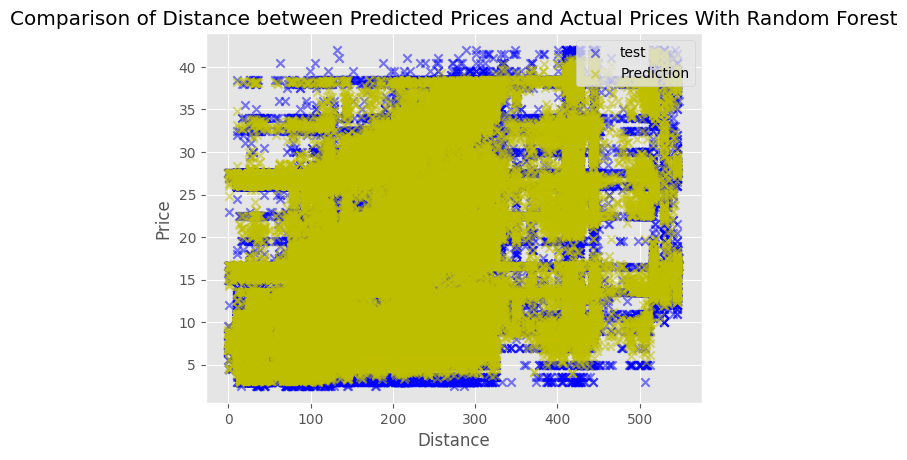

In [49]:
x_axis = X_test.distance 

plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = 'x', label = 'test')
plt.scatter(x_axis, predictions_rf, c = 'y', alpha = 0.5, marker = 'x', label = 'Prediction')
plt.xlabel('Distance')
plt.ylabel('Price') 
plt.title("Comparison of Distance between Predicted Prices and Actual Prices With Random Forest")
plt.legend(loc = 'upper right')

plt.show()

## Model Inferance

In [63]:
predict_dataset = pd.DataFrame({
    "Actual":y_test,
    "Linear Regression Prediction":base_pred,
    "Polynomial Regression (d = 2) Prediction":poly_2_pred,
    "Polynomial Regression (d = 3) Prediction":poly_3_pred,
    "Decision Tree Regression Prediction":predictions_dt,
    "Random Forest Prediction":predictions_rf
}).reset_index(drop=True)

PredictModel

,Actual,Linear Regression Prediction,Polynomial Regression (d = 2) Prediction,Polynomial Regression (d = 3) Prediction,Decision Tree Regression Prediction,Random Forest Prediction
0,13.500000,14.437863,14.507299,13.494806,13.500000,13.500000
1,13.500000,14.412417,15.002601,13.652352,13.500000,13.500000
2,16.500000,17.922264,18.680299,18.090570,19.500000,19.200000
3,22.500000,20.486924,27.775290,25.679538,25.916667,25.414738
4,13.500000,20.105537,16.158449,13.383692,13.500000,13.500000
...,...,...,...,...,...,...
205522,16.545125,12.412857,14.065207,15.151950,16.545125,16.545125
205523,13.000000,9.343892,17.840594,15.031207,19.333333,19.170774
205524,34.000000,19.712673,25.138796,33.998865,32.500000,33.140667
205525,34.000000,18.849196,24.225851,32.792941,34.000000,33.810000


## Model Evaluation

### Create density plots to compare between predicted prices and actual prices of each model

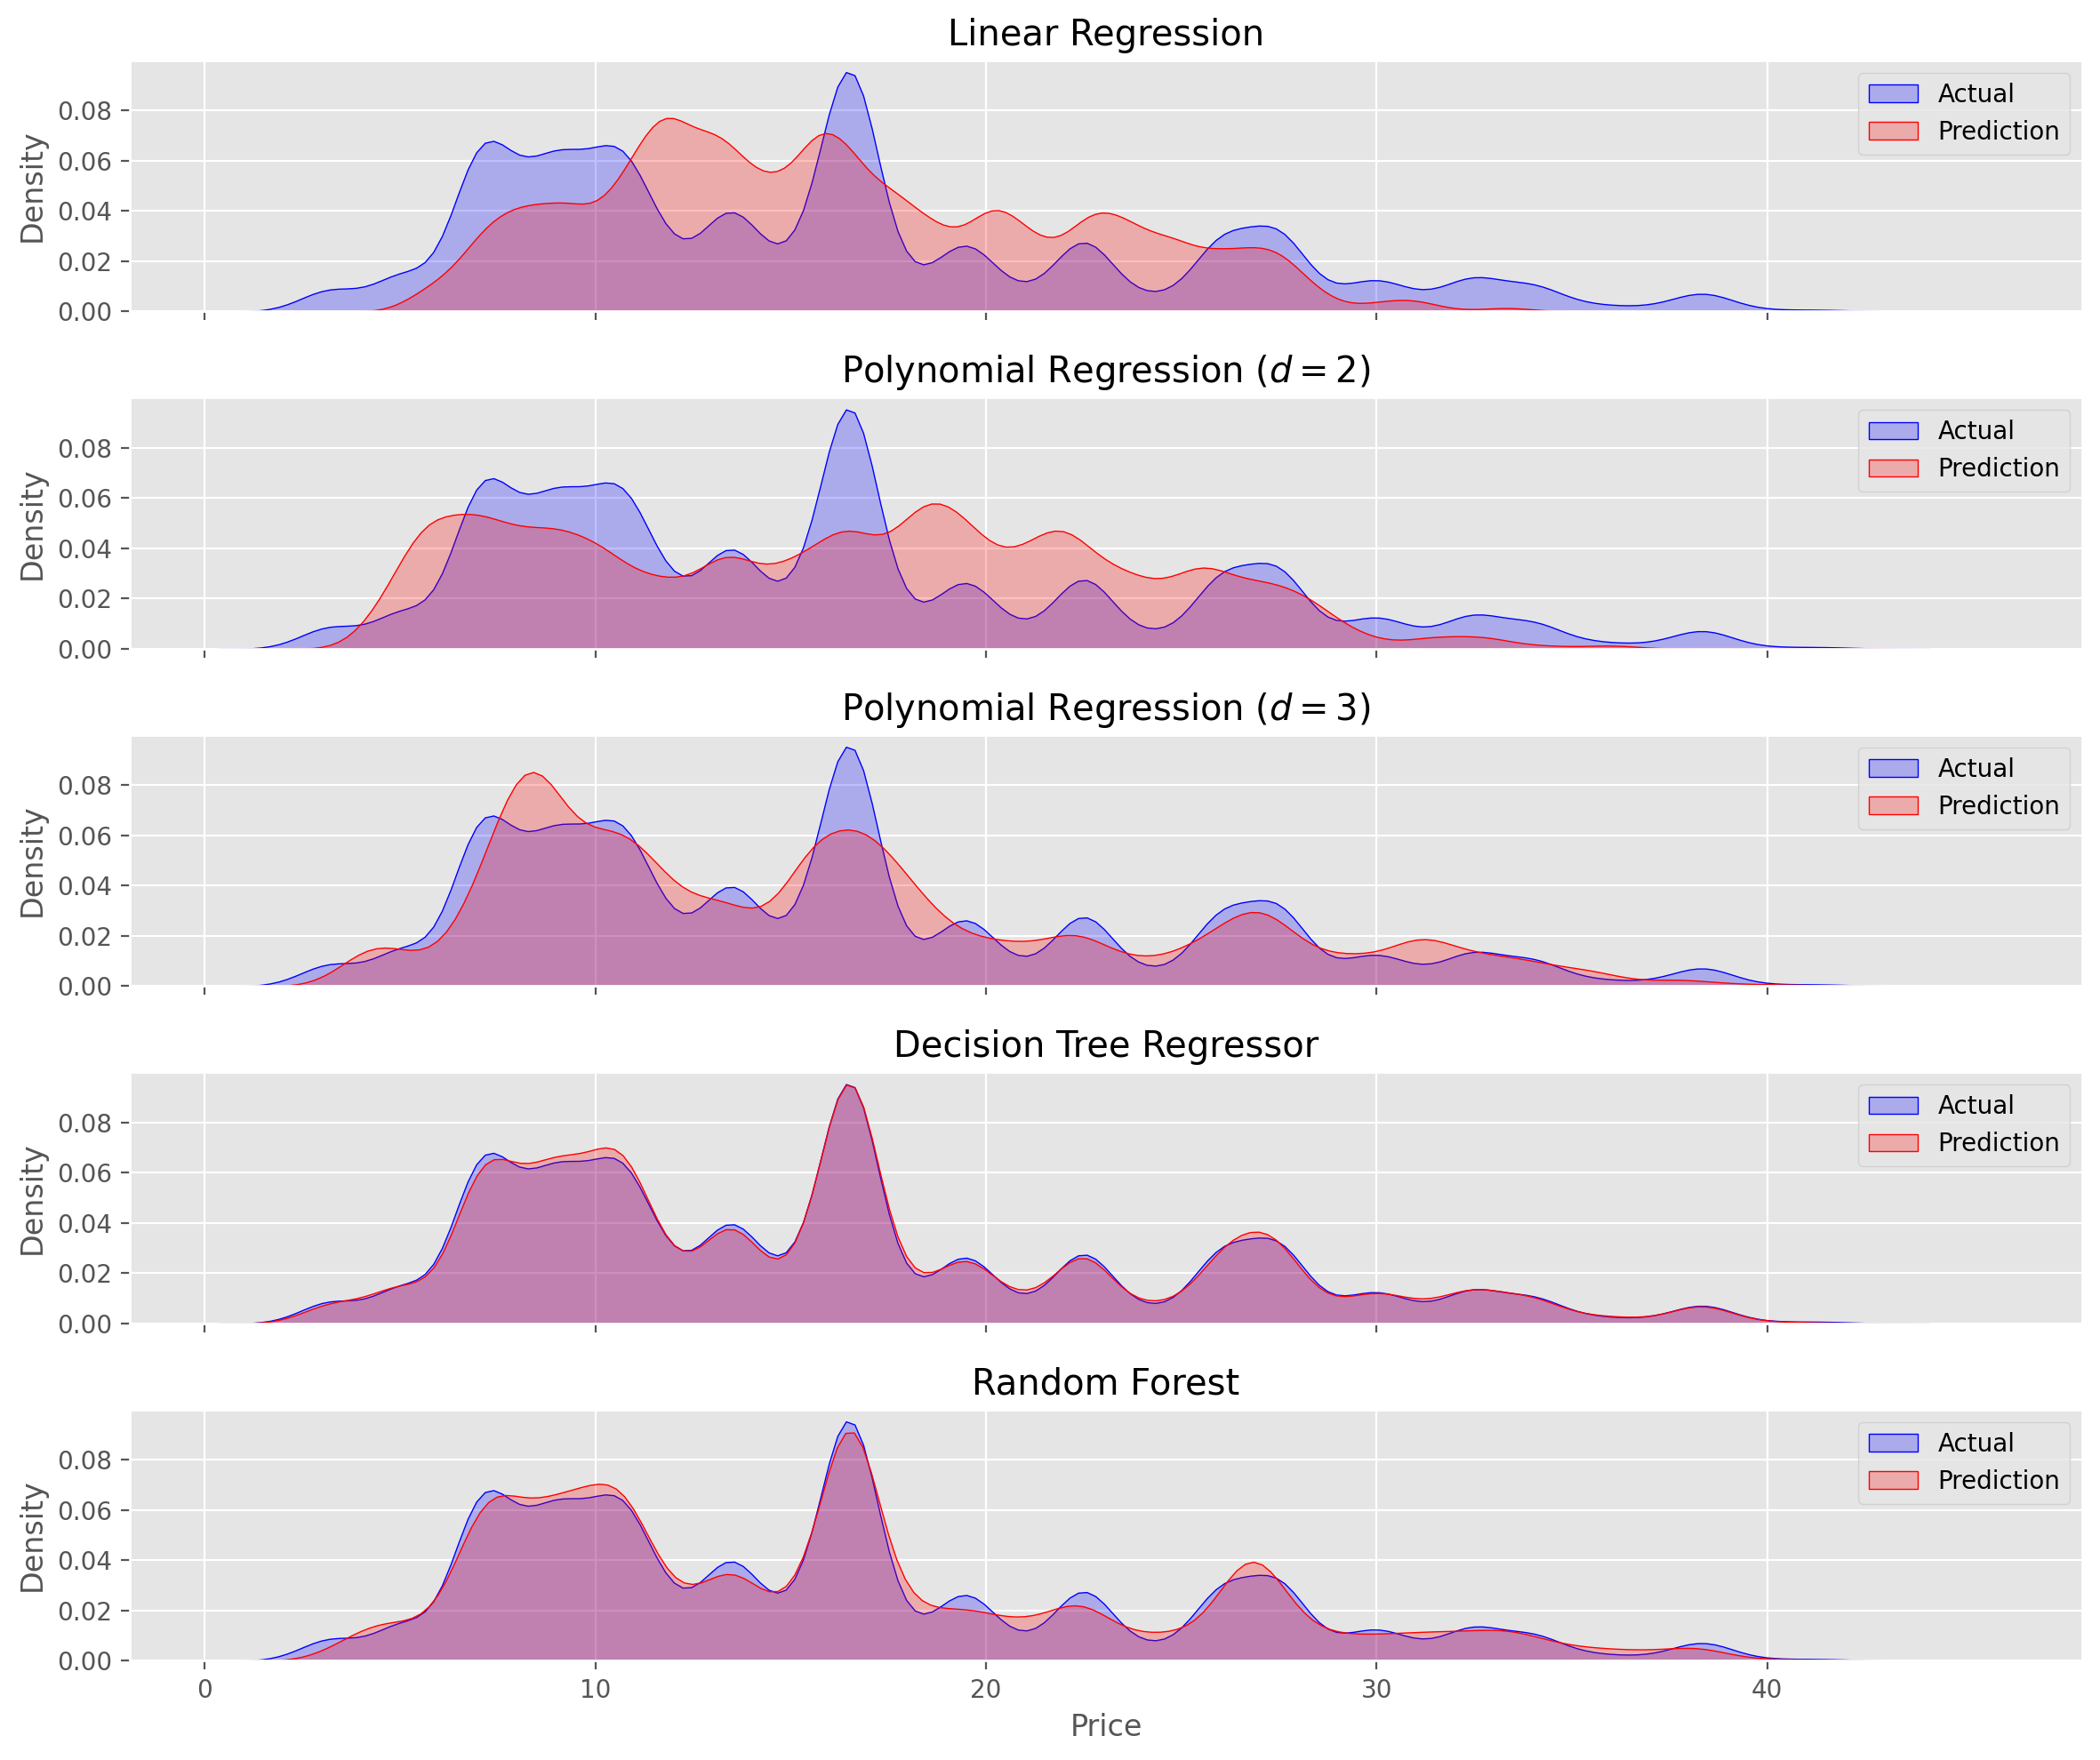

In [55]:
fig,ax = plt.subplots(figsize=(12,10),dpi=200,nrows=5,ncols=1,sharex=True)

sns.kdeplot(y_test,color="blue",fill=True,label="Actual",ax=ax[0])
sns.kdeplot(base_pred,color="red",fill=True,label="Prediction",ax=ax[0])
ax[0].set_title("Linear Regression")
ax[0].set_xlabel("Price")
ax[0].legend(loc="upper right")

sns.kdeplot(y_test,color="blue",fill=True,label="Actual",ax=ax[1])
sns.kdeplot(poly_2_pred,color="red",fill=True,label="Prediction",ax=ax[1])
ax[1].set_title("Polynomial Regression $(d=2)$")
ax[1].set_xlabel("Price")
ax[1].legend(loc="upper right")

sns.kdeplot(y_test,color="blue",fill=True,label="Actual",ax=ax[2])
sns.kdeplot(poly_3_pred,color="red",fill=True,label="Prediction",ax=ax[2])
ax[2].set_title("Polynomial Regression $(d=3)$")
ax[2].set_xlabel("Price")
ax[2].legend(loc="upper right")

sns.kdeplot(y_test,color="blue",fill=True,label="Actual",ax=ax[3])
sns.kdeplot(predictions_dt,color="red",fill=True,label="Prediction",ax=ax[3])
ax[3].set_title("Decision Tree Regressor")
ax[3].set_xlabel("Price")
ax[3].legend(loc="upper right")

sns.kdeplot(y_test,color="blue",fill=True,label="Actual",ax=ax[4])
sns.kdeplot(predictions_rf,color="red",fill=True,label="Prediction",ax=ax[4])
ax[4].set_title("Random Forest")
ax[4].set_xlabel("Price")
ax[4].legend(loc="upper right")

plt.tight_layout()
plt.show()

To visualize the comparison between the actual and prediction values, we can use a density plot. Based on the plot below, it can be seen that the **Decision Tree Regressor** has the most accurate prediction. However, to avoid subjectivity, formal tests will be continued to see the MAE, RMSE, and R-squared values of each model that has the best value for making predictions.

Evaluate the models using metrics as follows:
- $ MAE = \frac{1}{n}\sum\limits_{i=1}^n |y_{i} - \hat{y}_{i}| $
- $ RMSE = \sqrt{\frac{1}{n}\sum\limits_{i=1}^n (y_{i} - \hat{y}_{i})^2} $
- $ R^2 = 1 - \frac{\sum(y_{i} - \hat{y}_{i})^2}{\sum(y_{i} - \bar{y}_{i})^2} $

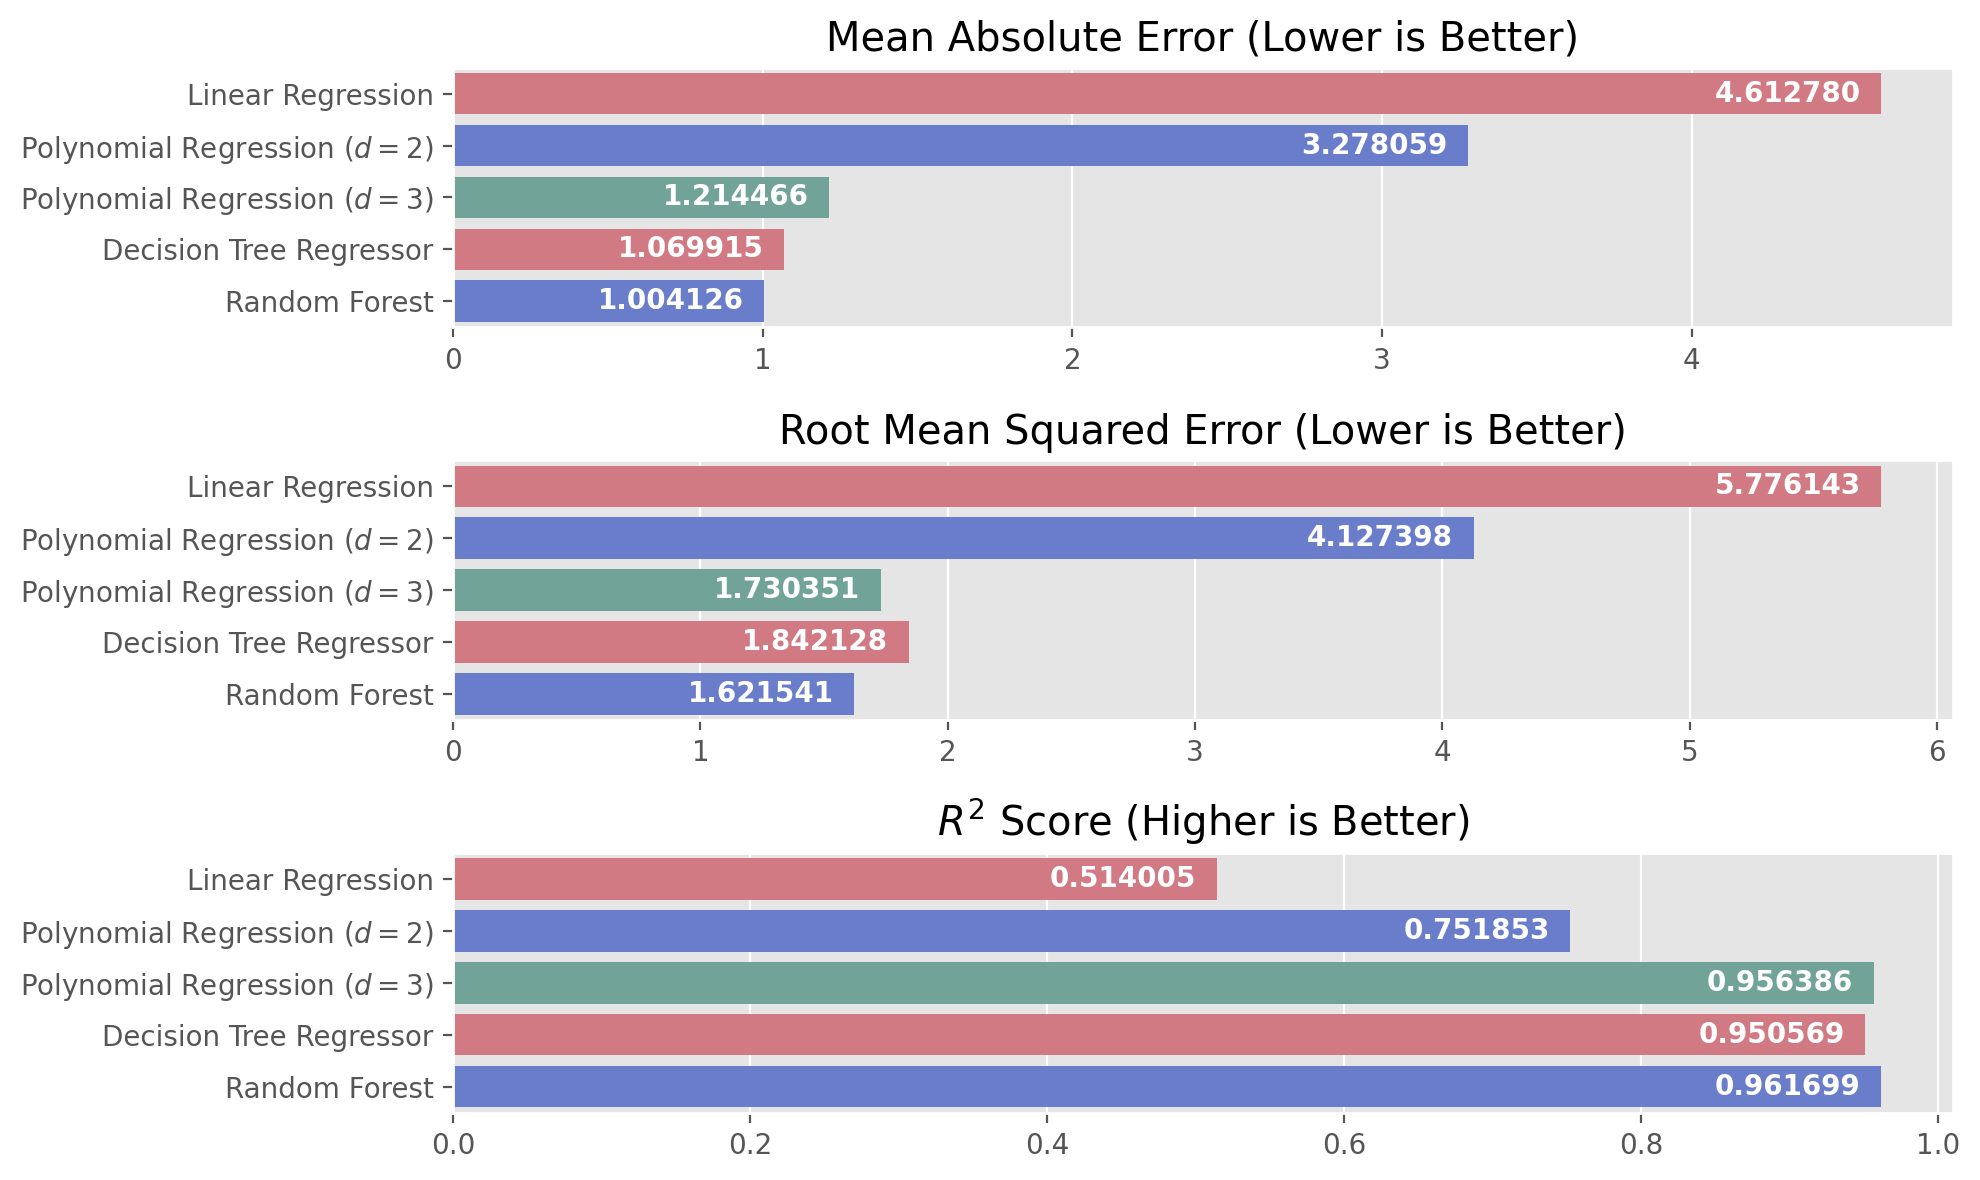

In [58]:
# Visualization
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

fig,ax = plt.subplots(figsize=(10,6),dpi=200,nrows=3,ncols=1)

barplot = sns.barplot(
    x=[mean_absolute_error(y_test,base_pred),mean_absolute_error(y_test,poly_2_pred),mean_absolute_error(y_test,poly_3_pred),mean_absolute_error(y_test,predictions_dt),mean_absolute_error(y_test,predictions_rf)],
    y=["Linear Regression","Polynomial Regression $(d=2)$","Polynomial Regression $(d=3)$","Decision Tree Regressor","Random Forest"],
    palette=["#E06C78","#5874DC","#6AAB9C"],
    ax=ax[0]
)
for i in barplot.containers:
    barplot.bar_label(i,fmt="%.6f",padding=-60,color="white",fontweight="bold")
ax[0].set_title("Mean Absolute Error (Lower is Better)")

barplot = sns.barplot(
    x=[np.sqrt(mean_squared_error(y_test,base_pred)),np.sqrt(mean_squared_error(y_test,poly_2_pred)),np.sqrt(mean_squared_error(y_test,poly_3_pred)),np.sqrt(mean_squared_error(y_test,predictions_dt)),np.sqrt(mean_squared_error(y_test,predictions_rf))],
    y=["Linear Regression","Polynomial Regression $(d=2)$","Polynomial Regression $(d=3)$","Decision Tree Regressor","Random Forest"],
    palette=["#E06C78","#5874DC","#6AAB9C"],
    ax=ax[1]
)
for i in barplot.containers:
    barplot.bar_label(i,fmt="%.6f",padding=-60,color="white",fontweight="bold")
ax[1].set_title("Root Mean Squared Error (Lower is Better)")

barplot = sns.barplot(
    x=[r2_score(y_test,base_pred),r2_score(y_test,poly_2_pred),r2_score(y_test,poly_3_pred),r2_score(y_test,predictions_dt),r2_score(y_test,predictions_rf)],
    y=["Linear Regression","Polynomial Regression $(d=2)$","Polynomial Regression $(d=3)$","Decision Tree Regressor","Random Forest"],
    palette=["#E06C78","#5874DC","#6AAB9C"],
    ax=ax[2]
)
for i in barplot.containers:
    barplot.bar_label(i,fmt="%.6f",padding=-60,color="white",fontweight="bold")
ax[2].set_title("$ R^{2} $ Score (Higher is Better)")

plt.tight_layout()
plt.show()

After calculating and comparing the values of MAE, RMSE, and R-Square for each model, the results show that the **Random Forest** method has the smallest MAE and RMSE values, and the highest R-square value of 96%, which indicates that the Random Forest model has a very high accuracy.It can be said that the best model in this test is **Random Forest**.

In [59]:
final_base_model = LinearRegression().fit(X,y)

x_symbol = [sp.Symbol(f"({i})") for i in X.columns.str.replace("_","")]
y_symbol = sp.Symbol("\hat{price}")

sums = np.round(final_base_model.intercept_,6)
for i in range(len(X.columns)):
    sums += x_symbol[i] * np.round(final_base_model.coef_[i],6)

sp.Eq(y_symbol,sums)

Eq(\hat{price}, 8.640243*(cabtype) + 0.001677*(days name) + 0.019847*(destination) + 0.02329*(distance) - 0.000471*(longsummary) - 1.562184*(name) + 0.763312*(productid) + 0.002574*(shortsummary) + 0.033256*(source) + 2.916086*(surgemultiplier) + 11.579319)

In [60]:
final_model_2_X = LinearRegression().fit(model_2_X,y)

x_symbol = [sp.Symbol(f"({i})") for i in X.columns.str.replace("_","")]

n = 1
x_symbol_ = []
for i in x_symbol:
    x_symbol_.append(i**2)
    for j in x_symbol[n:]:
        x_symbol_.append(i * j)
    n += 1
x_symbol = x_symbol + x_symbol_

y_symbol = sp.Symbol("\hat{price}")

sums = np.round(final_model_2_X.intercept_,6)
for i in range(model_2_X.shape[-1]):
    sums += x_symbol[i] * np.round(final_model_2_X.coef_[i],6)

sp.Eq(y_symbol,sums)

Eq(\hat{price}, 48.376998*(cabtype)**2 + 0.001874*(cabtype)*(days name) - 0.027802*(cabtype)*(destination) + 0.002038*(cabtype)*(distance) - 0.007203*(cabtype)*(longsummary) + 5.594555*(cabtype)*(name) - 20.692087*(cabtype)*(productid) + 0.005288*(cabtype)*(shortsummary) + 0.009655*(cabtype)*(source) + 48.376998*(cabtype) - 0.001351*(days name)**2 - 6.3e-5*(days name)*(destination) + 4.4e-5*(days name)*(distance) - 0.002023*(days name)*(longsummary) - 0.000563*(days name)*(name) - 6.4e-5*(days name)*(productid) - 0.000728*(days name)*(shortsummary) - 0.001102*(days name)*(source) - 0.00184*(days name)*(surgemultiplier) + 0.021334*(days name) - 0.005814*(destination)**2 - 0.000372*(destination)*(distance) - 0.000164*(destination)*(longsummary) - 0.003874*(destination)*(name) - 0.00066*(destination)*(productid) + 3.2e-5*(destination)*(shortsummary) - 0.009459*(destination)*(source) + 0.006935*(destination)*(surgemultiplier) + 0.247092*(destination) - 8.0e-6*(distance)**2 - 2.3e-5*(distan

In [61]:
final_poly_3_model = LinearRegression().fit(poly_3_X,y)

Create the final polynomial regression ($d=3$) model. To reduce the computational cost, it's best to skip writing the equation for polynomial regression d=3, decision tree regression, and random forest regression.

**Save all the final models for future use**:

In [68]:
from joblib import dump

final_models = [final_base_model,final_model_2_X,final_poly_3_model, model_3, model_4]
file_names = ["linear_regression","polynomial_2d_regression","polynomial_3d_regression", "decision_tree_regression", "random_forest_regression"]

for i,j in zip(final_models,file_names):
    dump(i,j + ".joblib")
    print(f"{j}.joblib has been saved successfully!")

linear_regression.joblib has been saved successfully!
polynomial_2d_regression.joblib has been saved successfully!
polynomial_3d_regression.joblib has been saved successfully!
decision_tree_regression.joblib has been saved successfully!
random_forest_regression.joblib has been saved successfully!


## Conclusion:

From the above analysis, several conclusions can be drawn:
1. Out of 57 attributes, 10 most influential attributes in predicting the price of online taxi services were selected based on correlation analysis, namely Name, Product_id, Distance, Source, Sugar_multiplier, destination, cab_type, days name, long_summary, and short_summary.
2. The testing method used 5 models, namely linear regression, polynomial regression d=2, polynomial regression d=3, decision tree regressor, and random forest. Based on the R-Square values, the accuracy of each model was obtained as 51.40%, 75.19%, 96.00%, 95.05%, and 96.17%.
3. The Random Forest Regression model is the most optimal model with an RMSE of 1.621541 and an MAE value of 1.004126.